In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pymc as pm
from pymc.Matplot import plot as pmplot

sns.set()

In [2]:
dick = pd.read_pickle('country_data.pkl')

def strip(x):
    return x.replace('\t','')

country_populations = pd.read_csv('world_pop.csv',
                                  sep=';',header=None,index_col=0,names=['population'],
                                        thousands=',',converters={0 : strip})



In [3]:
US = pd.read_pickle('us_state_dict.pkl')
ny = US['New York']
ny.index = pd.DatetimeIndex(ny.index)

dick['New York'] = ny
ny

,confirmed,deceased,inc,dead_inc,factor,dead_factor,density,gdp,pct_dead
2020-03-14,525.0,2.0,104.0,2.0,1.247031,NaN,1068.424744,89076,0.380952
2020-03-15,732.0,3.0,207.0,1.0,1.394286,1.500000,1068.424744,89076,0.409836
2020-03-16,967.0,10.0,235.0,7.0,1.321038,3.333333,1068.424744,89076,1.034126
2020-03-17,1706.0,13.0,739.0,3.0,1.764219,1.300000,1068.424744,89076,0.762016
2020-03-18,2495.0,16.0,789.0,3.0,1.462485,1.230769,1068.424744,89076,0.641283
2020-03-19,5365.0,34.0,2870.0,18.0,2.150301,2.125000,1068.424744,89076,0.633737
2020-03-20,8310.0,42.0,2945.0,8.0,1.548928,1.235294,1068.424744,89076,0.505415
2020-03-21,11710.0,60.0,3400.0,18.0,1.409146,1.428571,1068.424744,89076,0.512383
2020-03-22,15800.0,117.0,4090.0,57.0,1.349274,1.950000,1068.424744,89076,0.740506
2020-03-23,20884.0,158.0,5084.0,41.0,1.321772,1.350427,1068.424744,89076,0.756560


In [4]:
ita = dick['Italy']
us = dick['US']
swe =dick['Sweden']
ita.tail(60)

,confirmed,factor,inc,deceased,dead_factor,dead_inc,pct_dead,conf_over_dead,dead_conf_ratio
2020-02-28,888,1.355725,233.0,21,1.235294,4.0,2.364865,42.285714,0.911169
2020-02-29,1128,1.270270,240.0,29,1.380952,8.0,2.570922,38.896552,1.087133
2020-03-01,1694,1.501773,566.0,34,1.172414,5.0,2.007084,49.823529,0.780686
2020-03-02,2036,1.201889,342.0,52,1.529412,18.0,2.554028,39.153846,1.272507
2020-03-03,2502,1.228880,466.0,79,1.519231,27.0,3.157474,31.670886,1.236273
2020-03-04,3089,1.234612,587.0,107,1.354430,28.0,3.463904,28.869159,1.097049
2020-03-05,3858,1.248948,769.0,148,1.383178,41.0,3.836185,26.067568,1.107474
2020-03-06,4636,1.201659,778.0,197,1.331081,49.0,4.249353,23.532995,1.107703
2020-03-07,5883,1.268982,1247.0,233,1.182741,36.0,3.960564,25.248927,0.932039
2020-03-08,7375,1.253612,1492.0,366,1.570815,133.0,4.962712,20.150273,1.253031


In [5]:
countries = ['Sweden','Italy','Spain','US','New York','Germany',
             'Netherlands','Turkey']

dead_df = pd.DataFrame()

for c in countries:
    country = pd.DataFrame(dick[c])
    D = pd.DataFrame(country['dead_inc'])
    
    D['dead_inc'] = D['dead_inc'] / (country_populations.loc[c,'population'] / 1e6)
    
    D.reset_index(inplace=True,drop=True)
    
    zero_or_nan = (D.ne(0) & ~D.isna())
    
    first_non_zero = zero_or_nan.idxmax().values[0]
    
    D = D.loc[first_non_zero:]
    
    D.reset_index(inplace=True,drop=True)
    
    D.rename(columns={'dead_inc' : c},inplace=True)
    
    dead_df = pd.concat([dead_df,D],axis=1)


dead_df.tail(100)


,Sweden,Italy,Spain,US,New York,Germany,Netherlands,Turkey
0,0.099017,0.016539,0.021388,0.003021,0.102828,0.023871,0.058361,0.011857
1,0.000000,0.016539,0.021388,0.000000,0.051414,0.000000,0.000000,0.000000
2,0.000000,0.016539,0.021388,0.015106,0.359897,0.011935,0.116721,0.023714
3,0.099017,0.066157,0.042776,0.003021,0.154242,0.000000,0.000000,0.011857
4,0.099017,0.049618,0.106941,0.012084,0.154242,0.047742,0.058361,0.059285
...,...,...,...,...,...,...,...,...
62,NaN,7.674264,NaN,NaN,NaN,NaN,NaN,NaN
63,NaN,6.946532,NaN,NaN,NaN,NaN,NaN,NaN
64,NaN,6.863835,NaN,NaN,NaN,NaN,NaN,NaN
65,NaN,4.300234,NaN,NaN,NaN,NaN,NaN,NaN


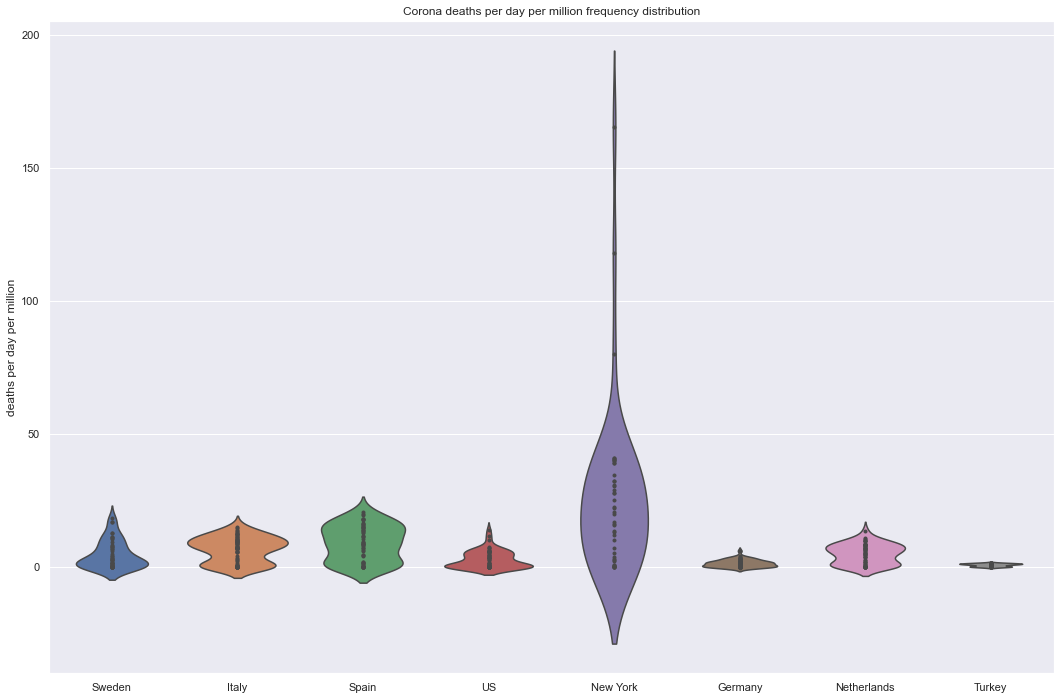

In [6]:
sns.set()
sns.set_style('darkgrid')

plt.figure(figsize=(18,12))
plt.title('Corona deaths per day per million frequency distribution')
plt.ylabel('deaths per day per million')

sns.violinplot(data=dead_df,scale='count',inner='point')
plt.savefig('violin_plot_deaths_per_day.jpg',format='jpg')

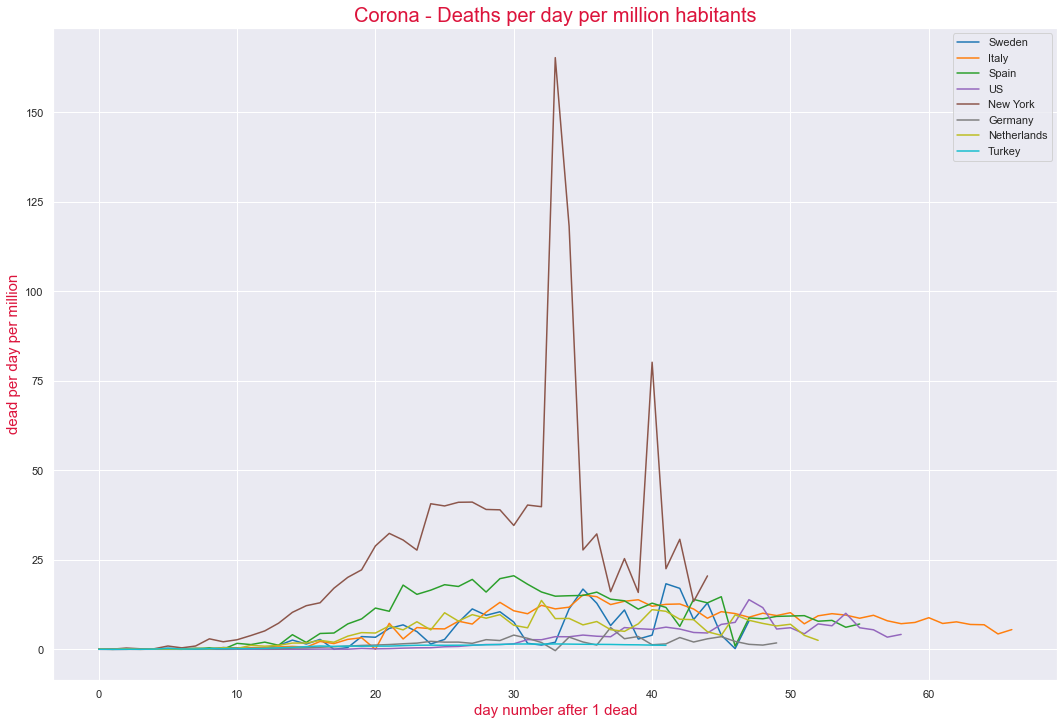

In [7]:
#plt.style.use('whitegrid')
sns.set_style('darkgrid')
dead_df.plot(figsize=(18,12),colormap='tab10')
plt.title('Corona - Deaths per day per million habitants',color='crimson',size=20)
plt.xlabel('day number after 1 dead',color='crimson',size=15)
plt.ylabel('dead per day per million',color='crimson',size=15)
plt.savefig('deaths_per_M_per_day.jpg',format='jpg')


/usr/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encou

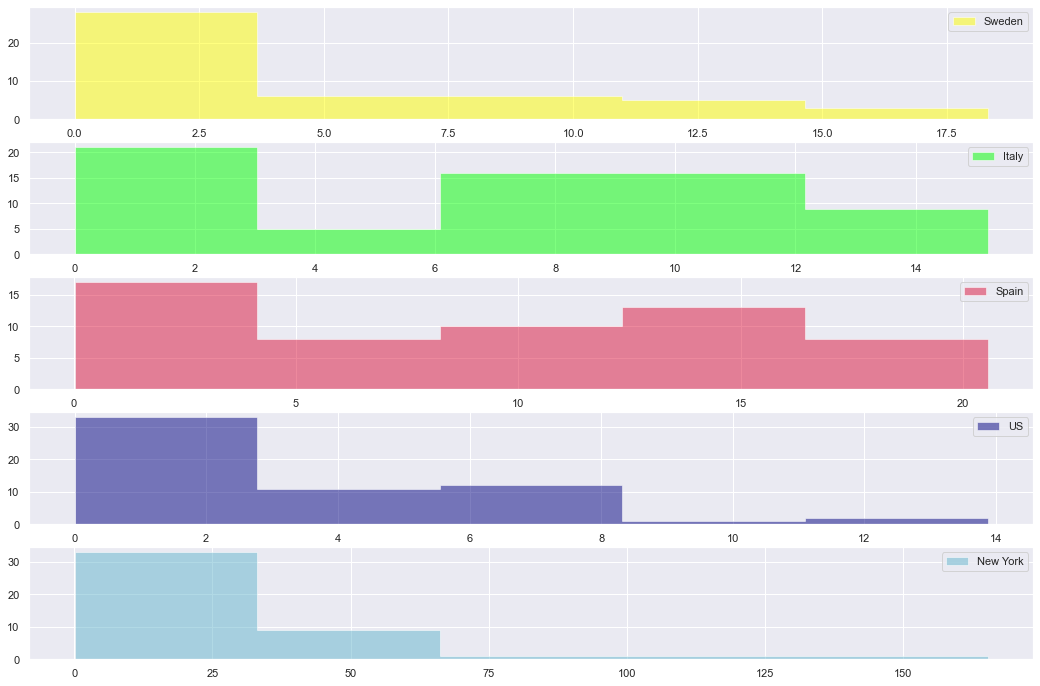

In [8]:
plt.figure(figsize=(18,12))
bins = 5
plt.subplot(511)
plt.hist(dead_df['Sweden'],histtype='stepfilled',color='yellow',alpha=0.5,label='Sweden',bins=bins)
plt.legend(loc='upper right')
plt.subplot(512)
plt.hist(dead_df['Italy'],histtype='stepfilled',color='lime',alpha=0.5,label='Italy',bins=bins)
plt.legend(loc='upper right')
plt.subplot(513)
plt.hist(dead_df['Spain'],histtype='stepfilled',color='crimson',alpha=0.5,label='Spain',bins=bins)
plt.legend(loc='upper right')
plt.subplot(514)
plt.hist(dead_df['US'],histtype='stepfilled',color='navy',alpha=0.5,label='US',bins=bins)
plt.legend(loc='upper right')
plt.subplot(515)
plt.hist(dead_df['New York'],histtype='stepfilled',color='c',alpha=0.5,label='New York',bins=bins)
plt.legend(loc='upper right')